# Plotting Data

In [1]:
import intelligent_plant.app_store_client as app_store_client
import os
app_store = app_store_client.AppStoreClient(os.environ["ACCESS_TOKEN"])
data_core = app_store.get_data_core_client()

Look up the fully qualified names of authorised data sources.
Check that 'IP Datasource 2' appears in this list for you.

In [2]:
list(map(lambda x: x['Name']['QualifiedName'], data_core.get_data_sources(["*"])))

['IP Datasource', 'IP Datasource 2', 'Vibration']

We'll use IP Datasource 2 as an example

In [3]:
dsn = "IP Datasource 2"

Get the 1st page of the tag list for the data source

In [4]:
tags = data_core.get_tags(dsn)

tag_names = list(map(lambda x: x["Id"], tags))

Show the tag list

In [5]:
tag_names

['Air Scour Blowers_Outlet_PI',
 'Antifoam Inj Pump A_PI',
 'Antifoam Inj Pump B_PI',
 'Anti-Scalent Pump A_PI',
 'Anti-Scalent Pump B_PI',
 'Biocide (Oil) Inj Pump A_PI',
 'Biocide (Oil) Inj Pump B_PI',
 'Biocide (Water) Inj Pump A_PI',
 'Biocide (Water) Inj Pump B_PI',
 'CALC_Scaled_HP Flare Header Cold_PI',
 'CALC_Scaled_HP Flare Header Wet_PI',
 'CIP Cartridge Filter_PI',
 'Coagulant Inj Pump A_PI',
 'Coagulant Inj Pump B_PI',
 'Cond Acc_PI',
 'Cond Flash Drum_PI',
 'Cond Heater_SS Out_PI',
 'Corrosion Inhibitor HP Inj Pump A_PI',
 'Corrosion Inhibitor HP Inj Pump B_PI',
 'Corrosion Inhibitor LP Inj Pump A_PI']

Make a request for plot data for the 1st tag in the list

In [6]:
data = data_core.get_plot_data({dsn: [tag_names[0]]}, "*-30d", "*", 30)

Import the intelligent plant utility and matplotlib

The IP utility esily transforms data returned by the data core API into a pandas data frame

Matplotlib is used to make plots

In [7]:
import intelligent_plant.utility as utility
import matplotlib.pyplot as plt

Use the IP utility to transform the response object into a data frame

In [8]:
data_frame = utility.query_result_to_data_frame(data)

In [9]:
data_frame

,TimeStamp,Air Scour Blowers_Outlet_PI
0,2020-06-13 09:04:05.983000+00:00,0.001126
1,2020-06-14 09:53:45.293344800+00:00,0.000270
2,2020-06-15 10:43:24.603689600+00:00,0.000966
3,2020-06-16 11:33:03.914034400+00:00,0.000265
4,2020-06-17 12:22:43.224379200+00:00,0.000323
5,2020-06-18 13:12:22.534724+00:00,0.000855
6,2020-06-19 14:02:01.845068800+00:00,0.000835
7,2020-06-20 14:51:41.155413600+00:00,-0.000070
8,2020-06-21 15:41:20.465758400+00:00,0.007033
9,2020-06-22 16:30:59.776103200+00:00,0.000406


Plot the data frame

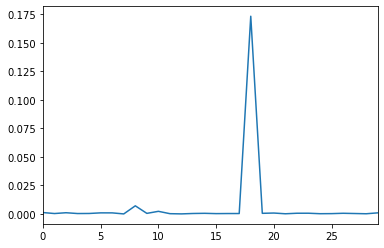

In [10]:
data_frame["Air Scour Blowers_Outlet_PI"].plot()